In [23]:
from pymatgen.io.cif import CifParser
from urllib.request import urlopen
from pymatgen.ext.matproj import MPRester
key = "WTLdCjI9MI1HfT5qqd"

In [24]:
from pymatgen.io.cif import CifParser

In [25]:
m = MPRester(key)

In [26]:
results = m.query({'formula_anonymous': 'ABC3'}, properties = ["cif", "band_gap"])

  0%|          | 0/4358 [00:00<?, ?it/s]

 11%|█▏        | 500/4358 [00:00<00:04, 845.98it/s]

 23%|██▎       | 1000/4358 [00:01<00:03, 914.93it/s]

 34%|███▍      | 1500/4358 [00:01<00:02, 991.97it/s]

 46%|████▌     | 2000/4358 [00:02<00:02, 905.42it/s]

 57%|█████▋    | 2500/4358 [00:02<00:01, 967.11it/s]

 69%|██████▉   | 3000/4358 [00:03<00:01, 930.08it/s]

 80%|████████  | 3500/4358 [00:03<00:00, 994.35it/s]

 92%|█████████▏| 4000/4358 [00:04<00:00, 951.31it/s]

100%|██████████| 4358/4358 [00:04<00:00, 879.84it/s]

100%|██████████| 4358/4358 [00:04<00:00, 922.07it/s]

In [27]:
mean_atomic_numbers = []
max_atomic_numbers = []
min_atomic_numbers = []
std_atomic_numbers = []

a_parameters = []
b_parameters = []
c_parameters = []
alpha_parameters = []
beta_parameters = []
gamma_parameters = []

mean_distance_matrix = []
max_distance_matrix = []
min_distance_matrix = []
std_distance_matrix = []

band_gaps = []

In [28]:
import numpy as np

In [49]:
for r in results:
    cif = r['cif']
    bg = r['band_gap']
    if bg > 1 and bg < 8:
        parser = CifParser.from_string(cif)
        structure = parser.get_structures()
        structure = structure[0]
        mean_atomic_numbers += [np.mean(structure.atomic_numbers)]
        max_atomic_numbers += [np.max(structure.atomic_numbers)]
        min_atomic_numbers += [np.min(structure.atomic_numbers)]
        std_atomic_numbers += [np.std(structure.atomic_numbers)]
        a_parameters += [structure.lattice.abc[0]]
        b_parameters += [structure.lattice.abc[1]]
        c_parameters += [structure.lattice.abc[2]]
        alpha_parameters += [structure.lattice.angles[0]]
        beta_parameters += [structure.lattice.angles[1]]
        gamma_parameters += [structure.lattice.angles[2]]
        mean_distance_matrix += [np.mean(structure.distance_matrix)]
        max_distance_matrix += [np.max(structure.distance_matrix)]
        min_distance_matrix += [np.min(structure.distance_matrix)]
        std_distance_matrix += [np.std(structure.distance_matrix)]

        band_gaps += [bg]


/home/user/.local/lib/python3.8/site-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


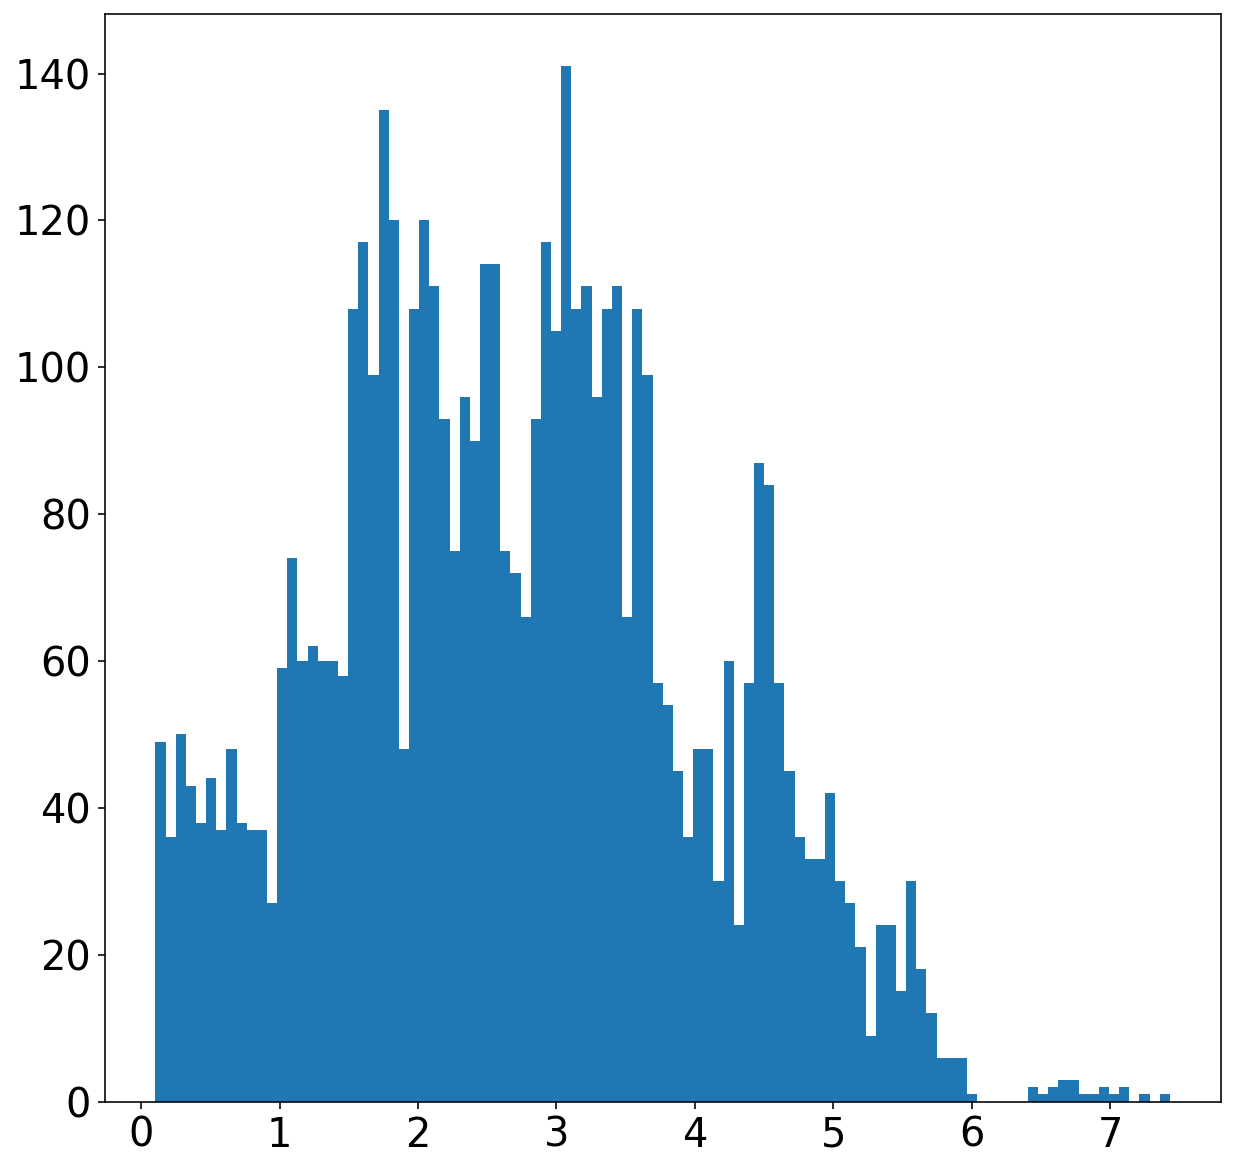

In [50]:
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size':20})

plt.figure(figsize = (10,10))
plt.hist(band_gaps, bins=100)
plt.savefig('Histogram_PDF', bbox_inches='tight')

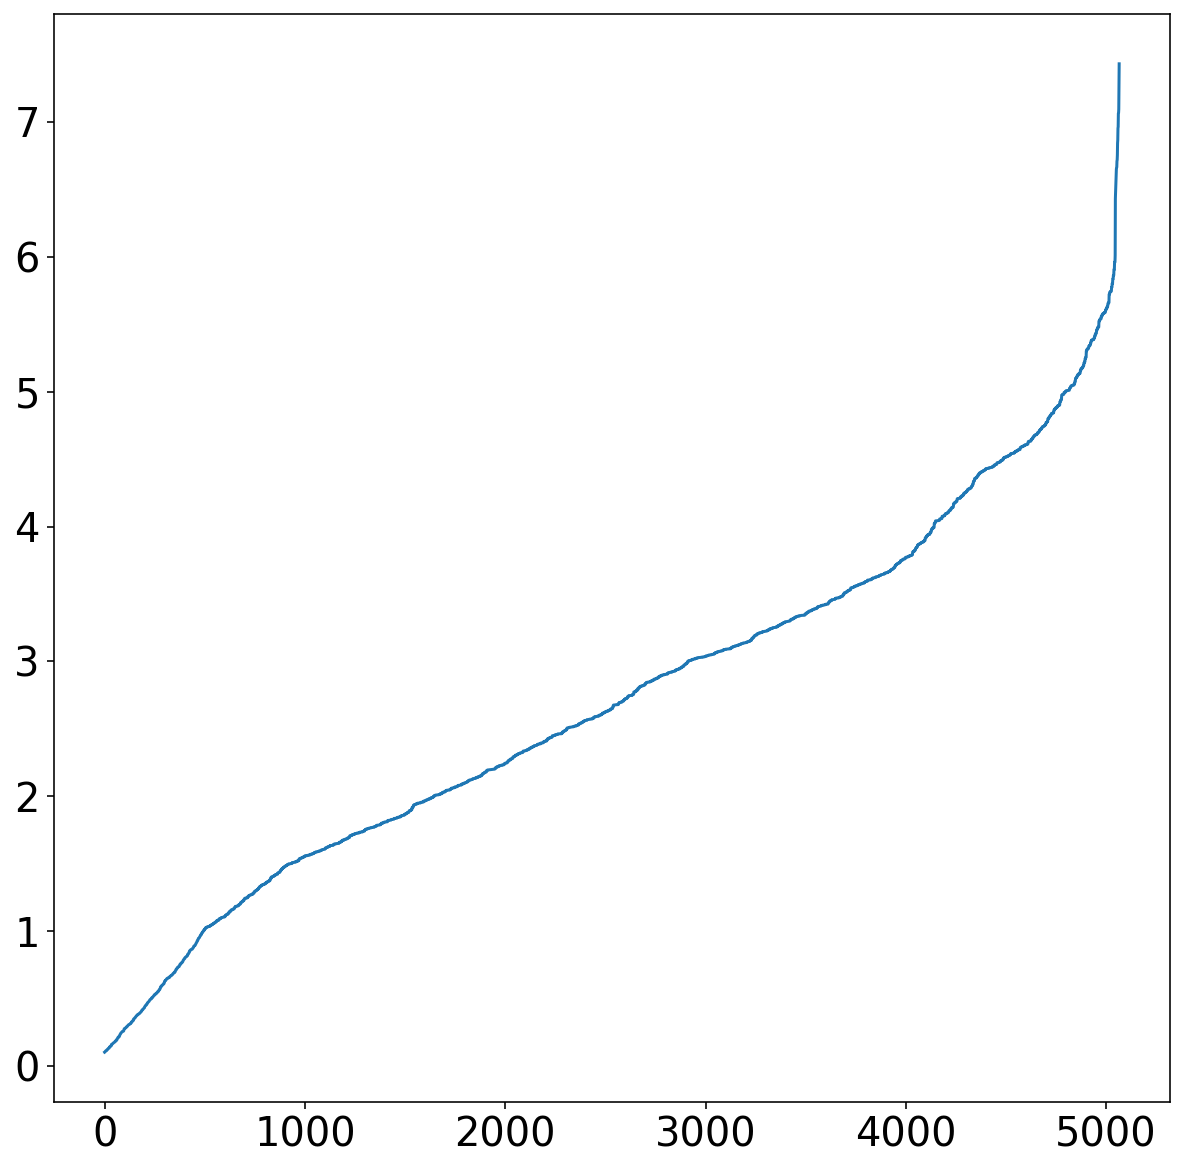

In [51]:
band_gaps_sorted = sorted(band_gaps)

plt.figure(figsize = (10,10))
plt.plot(band_gaps_sorted)
plt.xlabel('')
plt.ylabel('')
plt.savefig('Scatterplot', bbox_inches='tight')

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

dataset_df = pd.DataFrame({"mean_atomic_numbers":mean_atomic_numbers,
                          "max_atomic_numbers":max_atomic_numbers,
                          "min_atomic_numbers":min_atomic_numbers,
                          "std_atomic_numbers":std_atomic_numbers,
                          "a_parameters":a_parameters,
                          "b_parameters":b_parameters,
                          "c_parameters":c_parameters,
                          "alpha_parameters":alpha_parameters,
                          "beta_parameters":beta_parameters,
                          "gamma_parameters":gamma_parameters,
                          "mean_distance_matrix":mean_distance_matrix,
                          "max_distance_matrix":max_distance_matrix,
                          "min_distance_matrix":min_distance_matrix,
                          "std_distance_matrix":std_distance_matrix
                          })

In [53]:
scaler = StandardScaler().fit(dataset_df)
scaled_dataset_df = scaler.transform(dataset_df)

In [54]:
dataset_df.head()

,mean_atomic_numbers,max_atomic_numbers,min_atomic_numbers,std_atomic_numbers,a_parameters,b_parameters,c_parameters,alpha_parameters,beta_parameters,gamma_parameters,mean_distance_matrix,max_distance_matrix,min_distance_matrix,std_distance_matrix
0,53.2,83,15,21.775215,6.142485,6.142485,6.142485,90.0,90.0,90.0,3.247491,5.319548,0.0,1.742598
1,49.6,83,38,17.442477,6.216867,6.216867,6.216867,90.0,90.0,90.0,3.286816,5.383965,0.0,1.763700
2,43.2,56,15,16.678129,6.166984,6.166984,6.166984,90.0,90.0,90.0,3.260443,5.340765,0.0,1.749549
3,21.6,72,8,25.247574,4.072456,4.072456,4.072456,90.0,90.0,90.0,2.153080,3.526850,0.0,1.155339
4,15.2,32,8,9.600000,3.783237,3.783237,3.783237,90.0,90.0,90.0,2.000172,3.276379,0.0,1.073289


In [55]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(scaled_dataset_df, band_gaps, test_size=.2, random_state=None)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

0.2608098520126163
0.8501210225091451


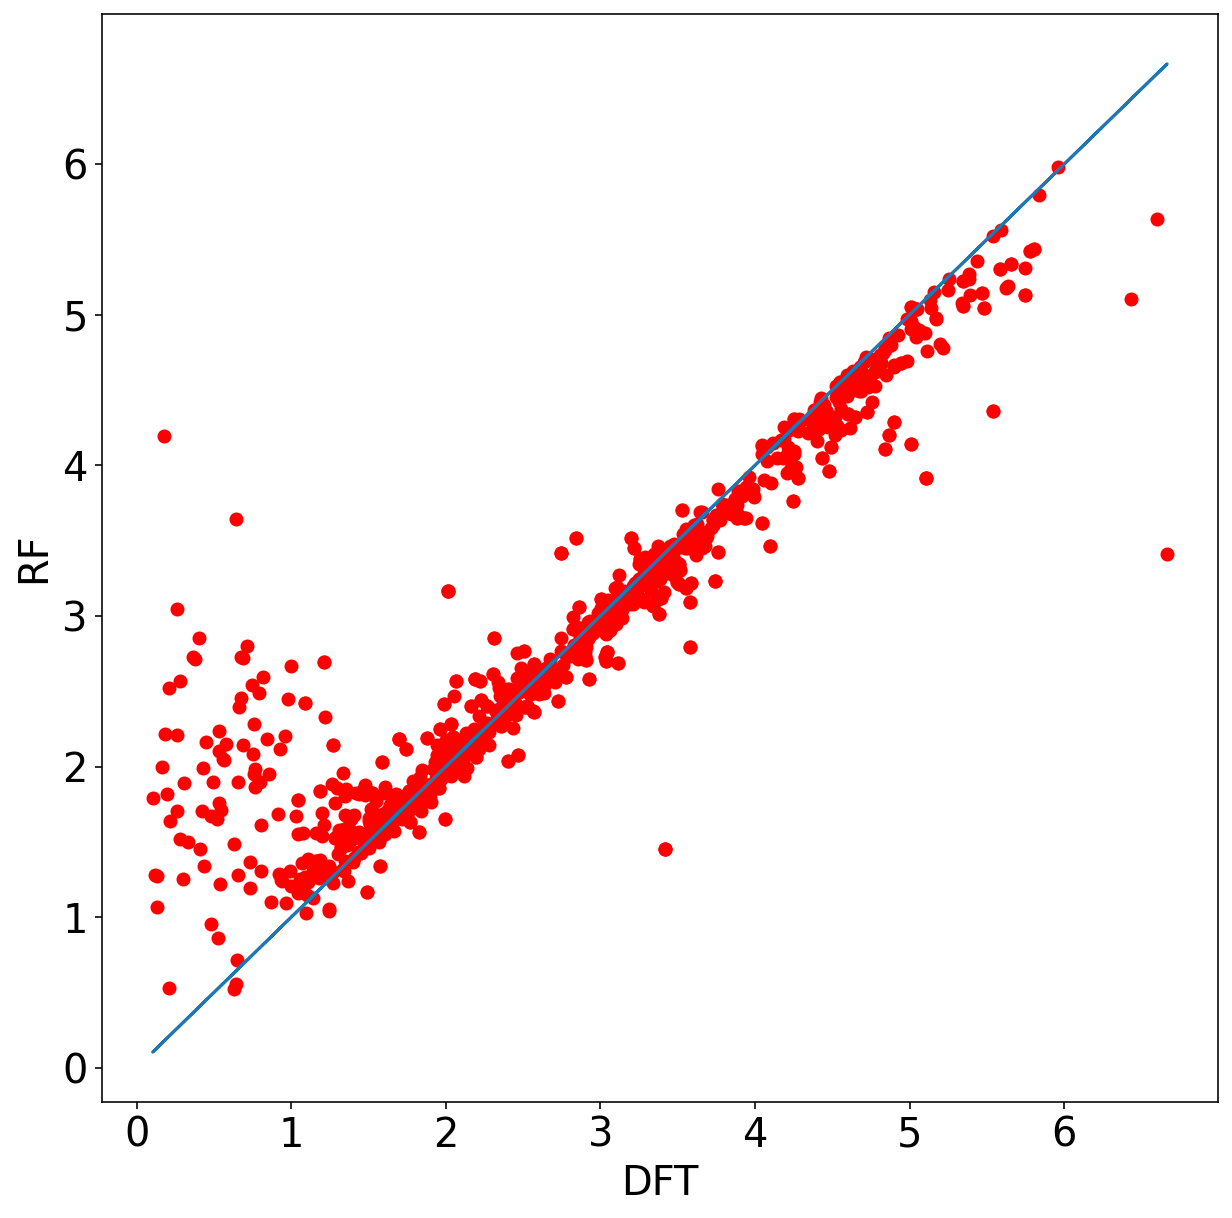

In [57]:
regr = RandomForestRegressor(n_estimators=400, max_depth=400, random_state=0)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)
print(mean_squared_error(y_test, y_predicted))
print(r2_score(y_test, y_predicted))

xPlot = y_test
yPlot = y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot, yPlot, 'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('RF')
plt.xlabel('DFT')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')

[20:54:48] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


[20:54:52] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
XGBOOST MSE	0.325171022143673

XGBOOST R2	0.8131347419107762



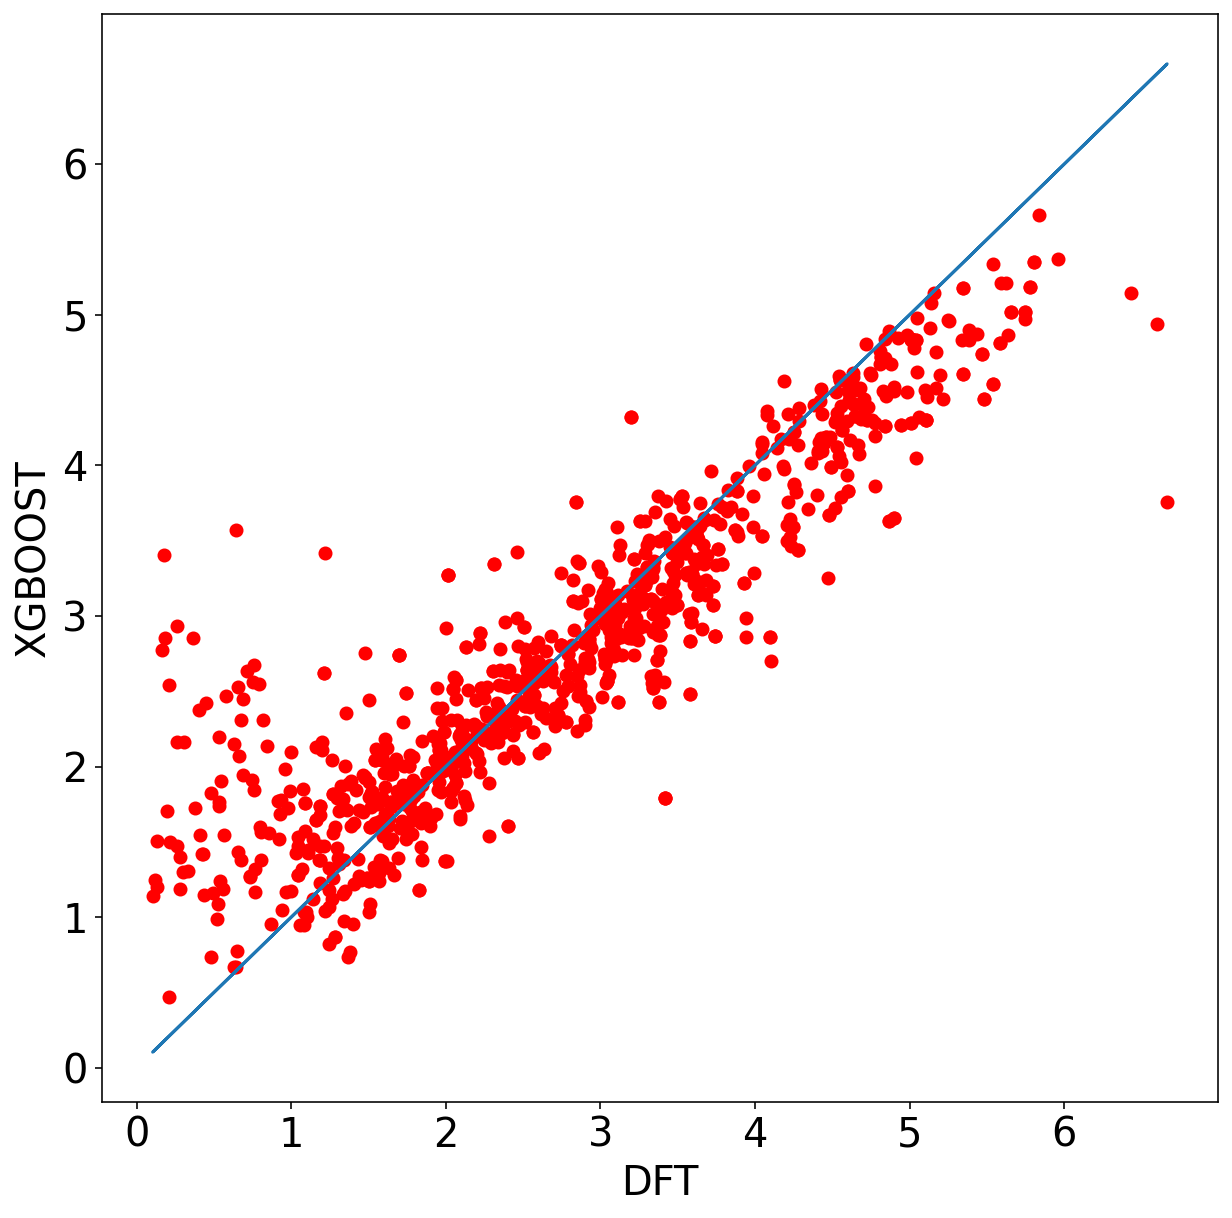

In [58]:
regr = XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1,
                    max_depth=400, alpha=10, n_estimators=400)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('XGBOOST MSE\t'+str(mean_squared_error(y_test, y_predicted))+'\n')
print('XGBOOST R2\t'+str(r2_score(y_test, y_predicted))+'\n')


xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('XGBOOST')
plt.xlabel('DFT')
plt.savefig('XGBOOST_Correlation_Test', bbox_inches='tight')